In [1]:
from boilerplate import *

In [4]:
dataset = get_data("quac")

Dataset quac downloaded and prepared to /root/.cache/huggingface/datasets/quac/plain_text/1.1.0/4170258e7e72d7c81bd6441b3f3489ea1544f0ff226ce61e22bb00c6e9d01fb6. Subsequent calls will reuse this data.


In [5]:
df = data_to_dataframe(dataset)

In [6]:
train, simple = df[0], df[2]
df = quac_mediumdf(train)

100%|██████████| 11567/11567 [00:09<00:00, 1238.96it/s]


In [7]:
df[68:72]

,wiki_page,background,section_title,context,question,answer
68,Hunter S. Thompson,Thompson was born into a middle-class family i...,Fear and Loathing in Las Vegas,The book for which Thompson gained most of his...,What is Fear and Loathing in Las Vegas?,The result of the trip to Las Vegas became the...
69,Hunter S. Thompson,Thompson was born into a middle-class family i...,Fear and Loathing in Las Vegas,The book for which Thompson gained most of his...,Did it do well?,the book was greeted with considerable critica...
70,Hunter S. Thompson,Thompson was born into a middle-class family i...,Fear and Loathing in Las Vegas,The book for which Thompson gained most of his...,Did he write it in Vegas?,CANNOTANSWER
71,Hunter S. Thompson,Thompson was born into a middle-class family i...,Fear and Loathing in Las Vegas,The book for which Thompson gained most of his...,who published the book?,"the 1972 book Fear and Loathing in Las Vegas, ..."


In [8]:
unanswerable = df[df["answer"]=="CANNOTANSWER"]
answerable = df[df["answer"]!="CANNOTANSWER"]
# unanswerable.head()

In [9]:
len(answerable), len(unanswerable)

(69109, 14459)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83568 entries, 0 to 83567
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   wiki_page      83568 non-null  object
 1   background     83568 non-null  object
 2   section_title  83568 non-null  object
 3   context        83568 non-null  object
 4   question       83568 non-null  object
 5   answer         83568 non-null  object
dtypes: object(6)
memory usage: 3.8+ MB


In [11]:
df["answer"].value_counts()

CANNOTANSWER                                                                                                                                 14459
album                                                                                                                                           15
1995,                                                                                                                                           12
1986                                                                                                                                            10
2012,                                                                                                                                           10
                                                                                                                                             ...  
Hornsby was the presenter when the Grateful Dead were inducted into the Rock and Roll Hall of Fame                    

In [13]:
medium_df = df

In [14]:
medium_df["answerable"] = medium_df["answer"].apply(lambda x: 0 if x=="CANNOTANSWER" else 1)

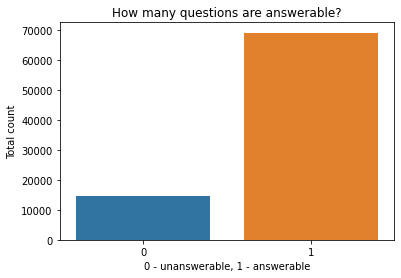

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
cnt = medium_df["answerable"].value_counts()
g0 = sns.barplot(x = cnt.index, y= cnt.values)
g0.set_title("How many questions are answerable?")
g0.set_xlabel("0 - unanswerable, 1 - answerable")
g0.set_ylabel("Total count")
plt.show()

In [18]:
df["context_length"] = df["context"].apply(lambda input: len(input))
df["answer_length"] = df["answer"].apply(lambda input: len(str(input)))
df["question_length"] = df["question"].apply(lambda input: len(input))
df["background_length"] = df["background"].apply(lambda input: len(input))

In [19]:
df.head()

,wiki_page,background,section_title,context,question,answer,answerable,context_length,answer_length,question_length,background_length
0,Malayali,The Malayali people or Keralite people (also s...,Geographic distribution and population,"According to the Indian census of 2001, there ...",Where is Malayali located?,"30,803,747 speakers of Malayalam in Kerala, ma...",1,2036,111,26,580
1,Malayali,The Malayali people or Keralite people (also s...,Geographic distribution and population,"According to the Indian census of 2001, there ...",What other languages are spoken there?,"33,015,420 spoke the standard dialects, 19,643...",1,2036,136,38,580
2,Malayali,The Malayali people or Keralite people (also s...,Geographic distribution and population,"According to the Indian census of 2001, there ...",What else is this place known for?,"World Malayalee Council, the organisation work...",1,2036,161,34,580
3,Malayali,The Malayali people or Keralite people (also s...,Geographic distribution and population,"According to the Indian census of 2001, there ...",Were they ever successful in doing this?,CANNOTANSWER,0,2036,12,40,580
4,Malayali,The Malayali people or Keralite people (also s...,Geographic distribution and population,"According to the Indian census of 2001, there ...",Do they produce anything from here?,CANNOTANSWER,0,2036,12,35,580


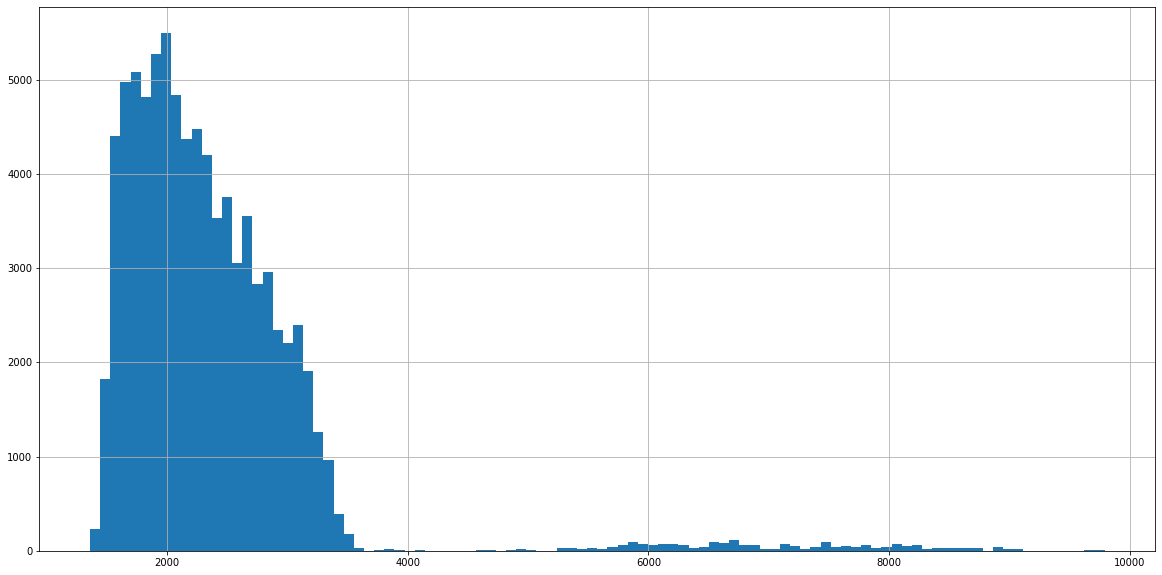

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
df["context_length"].hist(bins = 100)

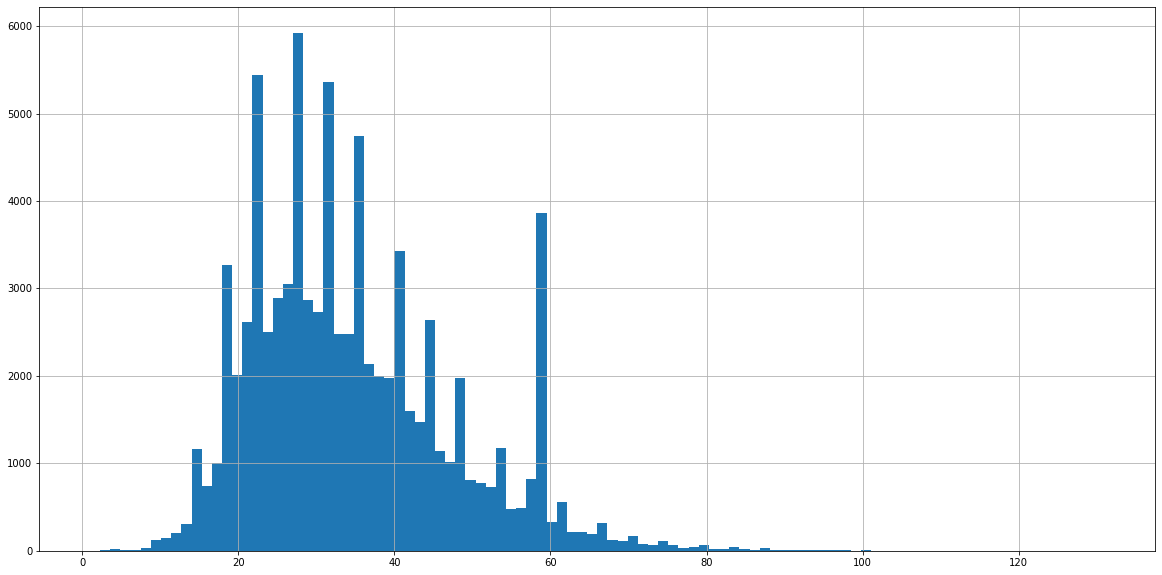

In [21]:
plt.figure(figsize=(20,10))
df["question_length"].hist(bins = 100)

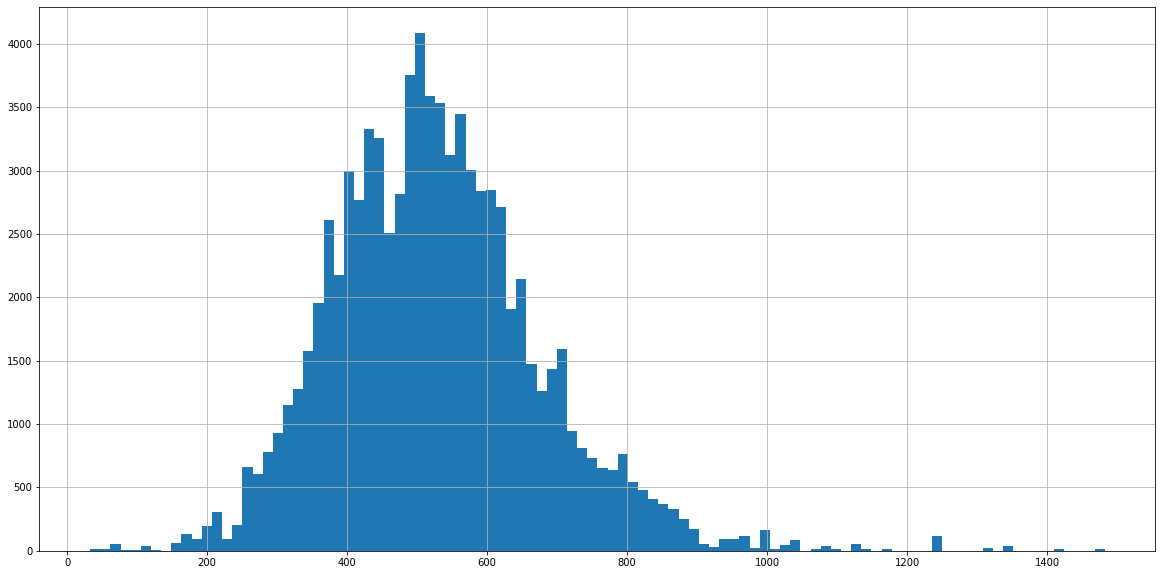

In [22]:
plt.figure(figsize=(20,10))
df["background_length"].hist(bins = 100)

album 115814
band 94802
cannotanswer 83568
new 78893
released 68831
time 68366
later 56409
year 54714
music 51055
film 46519
years 43210
single 41811
song 40148
second 37919
group 37619
tour 35128
world 34411
record 33128
played 33032
season 33007
said 32556
number 31697
team 30611
work 28537
songs 28267
including 27979
best 27579
did 27512
began 27502
early 27130
school 26998
series 26703
won 26463
career 24580
american 24190
life 24133
release 23855
records 23716
called 23556
york 23555


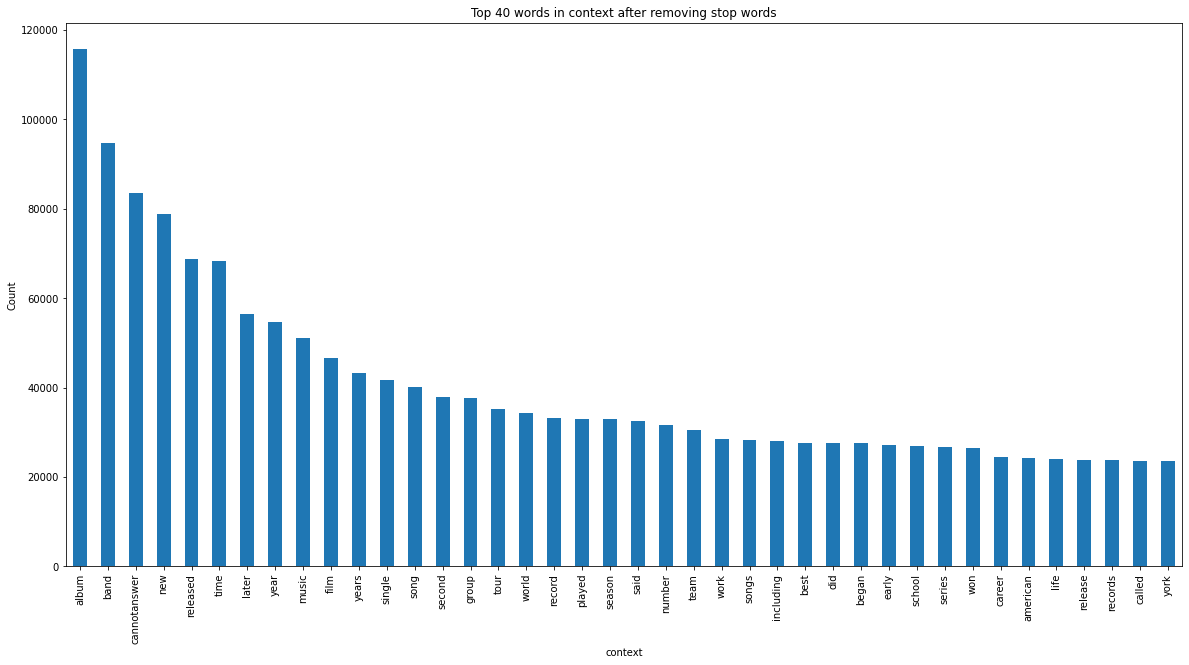

In [23]:
plt.figure(figsize=(20,10))
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['context'], 40)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['context' , 'count'])
df2.groupby('context').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', ylabel='Count', title='Top 40 words in context after removing stop words')

new york 22955
united states 16605
high school 8912
los angeles 8337
studio album 7082
york city 5468
debut album 4918
hot 100 4755
music video 4446
billboard 200 4321
award best 4298
album released 4276
years later 4186
world war 4082
hall fame 4006
year old 3958
following year 3944
second album 3815
billboard hot 3619
000 copies 3560
hip hop 3326
band released 3115
reached number 3061
peaked number 3045
san francisco 3019
later year 3007
new album 2977
million copies 2974
rock roll 2950
second single 2869
lead single 2849
years old 2837
released single 2808
band members 2715
singles chart 2708
released album 2677
world cup 2671
albums chart 2652
solo album 2615
york times 2567


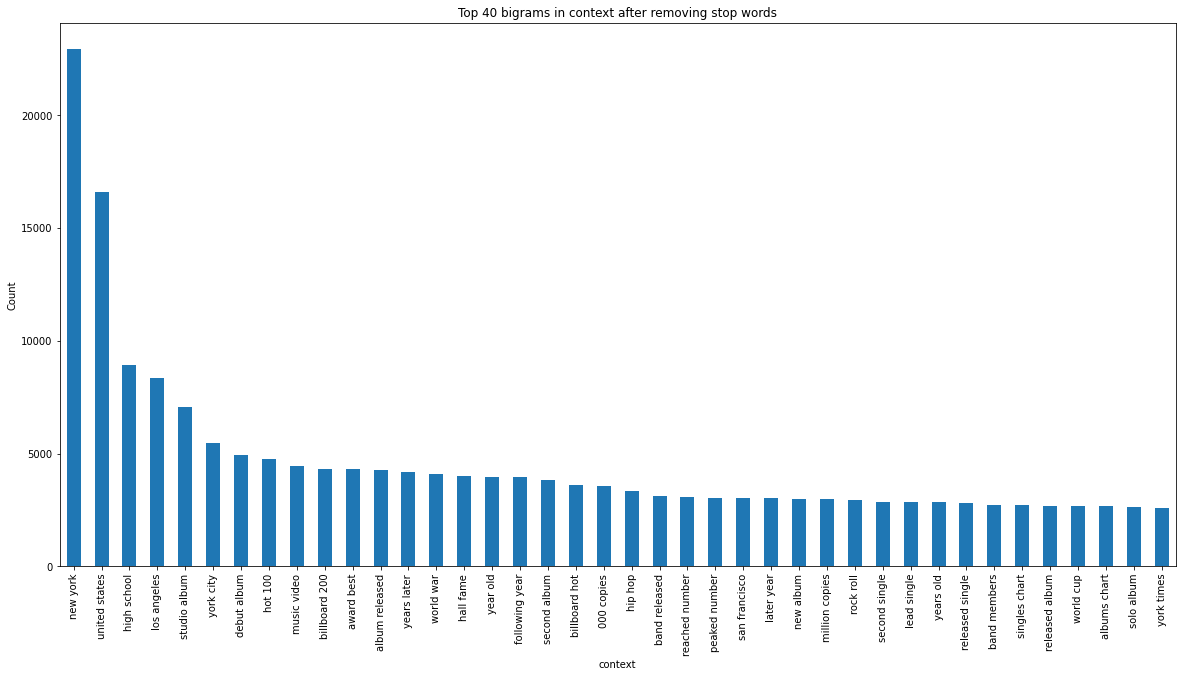

In [24]:
plt.figure(figsize=(20,10))
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['context'], 40)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['context' , 'count'])
df3.groupby('context').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', ylabel='Count', title='Top 40 bigrams in context after removing stop words')

In [25]:
def question_tagging(question):
    question = question.lower()
    
    if "what" in question:
      return "what"
    elif "when" in question:
      return "when"
    elif "who" in question:
      return "who"
    elif "how" in question:
      return "how"
    elif "which" in question:
      return "which"
    elif "where" in question:
      return "where"
    elif "why" in question:
      return "why"
    else:
      return "none"

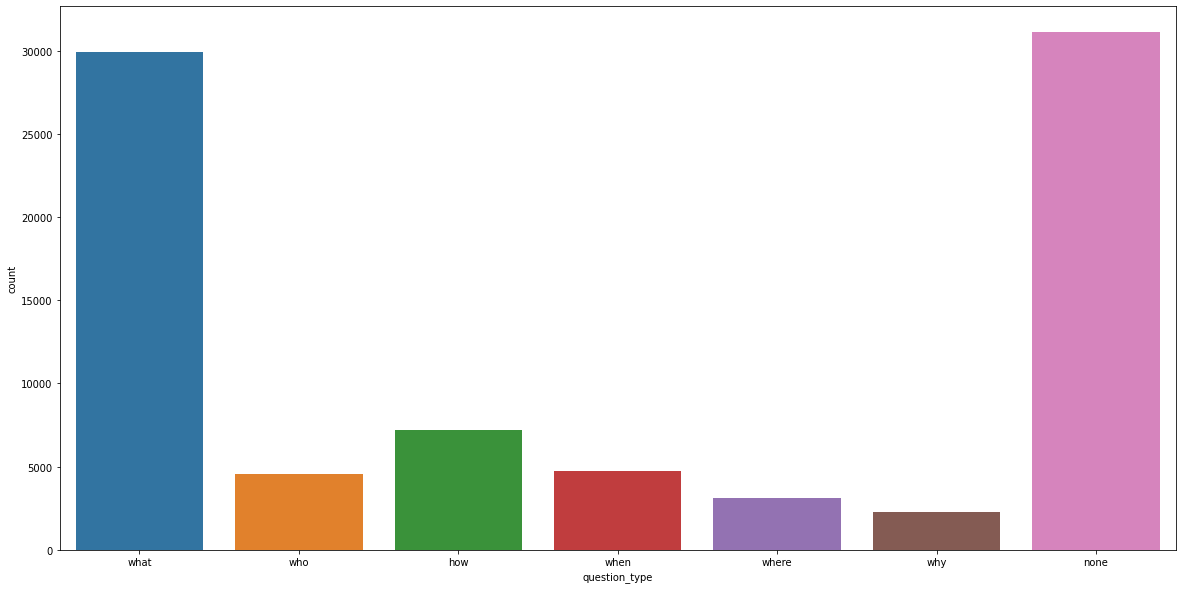

In [26]:
import seaborn as sns
plt.figure(figsize=(20,10))
df["question_type"] = df["question"].apply(question_tagging)
sns.countplot(x="question_type",data = df, order = ["what","who","how","when","where","why","none"])

In [27]:
df[df["question_type"] == "none"].head(10)

,wiki_page,background,section_title,context,question,answer,answerable,context_length,answer_length,question_length,background_length,question_type
3,Malayali,The Malayali people or Keralite people (also s...,Geographic distribution and population,"According to the Indian census of 2001, there ...",Were they ever successful in doing this?,CANNOTANSWER,0,2036,12,40,580,none
4,Malayali,The Malayali people or Keralite people (also s...,Geographic distribution and population,"According to the Indian census of 2001, there ...",Do they produce anything from here?,CANNOTANSWER,0,2036,12,35,580,none
5,Malayali,The Malayali people or Keralite people (also s...,Geographic distribution and population,"According to the Indian census of 2001, there ...",Is this population still growing?,"In 2010, the Census of Population of Singapore...",1,2036,103,33,580,none
6,Malayali,The Malayali people or Keralite people (also s...,Geographic distribution and population,"According to the Indian census of 2001, there ...",Is the country thriving?,CANNOTANSWER,0,2036,12,24,580,none
8,Malayali,The Malayali people or Keralite people (also s...,Language and literature,Malayalam is the language spoken by the Malaya...,Do they speak any other languages?,Malayalam is derived from old Tamil and Sanskr...,1,2850,68,34,580,none
9,Malayali,The Malayali people or Keralite people (also s...,Language and literature,Malayalam is the language spoken by the Malaya...,any literary items of interest?,Malayalam literature is ancient in origin. The...,1,2850,119,31,580,none
11,Malayali,The Malayali people or Keralite people (also s...,Language and literature,Malayalam is the language spoken by the Malaya...,were any of the poets listed by name?,"Madhava Panikkar, Sankara Panikkar and Rama Pa...",1,2850,146,37,580,none
12,Malayali,The Malayali people or Keralite people (also s...,Language and literature,Malayalam is the language spoken by the Malaya...,anything else of interest?,All his works are written between 1829 and 187...,1,2850,167,26,580,none
13,Malayali,The Malayali people or Keralite people (also s...,Language and literature,Malayalam is the language spoken by the Malaya...,any more recent literary works from them?,". In the second half of the 20th century, Jnan...",1,2850,170,41,580,none
19,Saosin,Saosin is an American post-hardcore band from ...,Arrival of Cove Reber and Saosin EP (2004-2006),After the audition process and several guest v...,Did they tour again?,The band continued touring for the rest of 200...,1,1737,102,20,435,none


In [28]:
!pip3 install bertopic[all] -q

     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 15.7MB 196kB/s 
     |████████████████████████████████| 92kB 12.5MB/s 
     |████████████████████████████████| 6.4MB 47.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 11.0MB/s 
     |████████████████████████████████| 13.2MB 237kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 4.3MB 52.1MB/s 
     |████████████████████████████████| 6.4MB 55.3MB/s 
     |████████████████████████████████| 450kB 44.2MB/s 
     |████████████████████████████████| 1.3MB 43.3MB/s 
     |████████████████████████████████| 1.2MB 35.6MB/s 
     |████████████████████████████████| 1.1MB 32.7MB/s 
     |████████████████████████████████| 624kB 44.6MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 

In [30]:
from bertopic import BERTopic

In [31]:
unique_contexts = df["context"].unique()

In [32]:
len(unique_contexts), len(train), len(df)

(6843, 11567, 83568)

In [33]:
train[50:53]

,dialogue_id,wikipedia_page_title,background,section_title,context,turn_ids,questions,followups,yesnos,answers,orig_answers
50,C_68ea0ff2b8e2499891cc35c93ecbdc18_0,Andrés Galarraga,Andres Jose Padovani Galarraga (Spanish: [an'd...,Atlanta Braves (1998-2000),"During his first season in Atlanta in 1998, Ga...","[C_68ea0ff2b8e2499891cc35c93ecbdc18_0_q#0, C_6...","[What position did he play with the Braves?, W...","[1, 0, 1, 0, 0, 0, 0, 1]","[2, 2, 2, 0, 0, 2, 2, 2]","{'texts': [['CANNOTANSWER'], ['He proved that ...","{'texts': ['CANNOTANSWER', 'He proved that he ..."
51,C_9a8de494ac20410197429216336c5831_1,Neal McCoy,"Hubert Neal McGaughey Jr. was born on July 30,...",1990-2000: Atlantic Records,"He then signed to Atlantic Records in 1990, ch...","[C_9a8de494ac20410197429216336c5831_1_q#0, C_9...","[What happened with Atlantic Records in 1990?,...","[0, 0, 0, 1, 1, 1, 2, 0]","[2, 2, 2, 1, 2, 2, 0, 2]",{'texts': [['He then signed to Atlantic Record...,{'texts': ['He then signed to Atlantic Records...
52,C_9a8de494ac20410197429216336c5831_0,Neal McCoy,"Hubert Neal McGaughey Jr. was born on July 30,...",Mid-Late 1990s,"You Gotta Love That, his fourth album, also re...","[C_9a8de494ac20410197429216336c5831_0_q#0, C_9...","[what happened to him in mid 1990s?, why did t...","[0, 2, 1, 0, 1, 2, 2, 1]","[2, 2, 2, 0, 2, 2, 2, 2]",{'texts': [['McCoy's self-titled fifth studio ...,{'texts': ['McCoy's self-titled fifth studio a...


In [34]:
topic_model = BERTopic(language="english", calculate_probabilities=True) # We need the probabilities to visualize
topics, probabilities = topic_model.fit_transform(unique_contexts)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [35]:
# Get the most frequent topics
topic_freq = topic_model.get_topic_freq()
outliers = topic_freq['Count'][topic_freq['Topic']==-1].iloc[0]
print(f"{outliers} documents have not been classified")
print(f"The other {topic_freq['Count'].sum() - outliers} documents are {topic_freq['Topic'].shape[0]-1} topics")

2177 documents have not been classified
The other 4666 documents are 49 topics


In [36]:
topic_freq.head()

,Topic,Count
0,-1,2177
1,0,1349
2,1,591
3,2,488
4,3,146


In [37]:
print(f"There are {topic_freq['Count'].iloc[1]} documents that are talking about topic ID {topic_freq['Topic'].iloc[1]}")

There are 1349 documents that are talking about topic ID 0


In [38]:
for i in range(10):
  topic_no = topic_freq['Topic'].iloc[i]
  print("Topic ", topic_no," : \n")
  print(topic_model.get_topic(topic_no))
  print("\n\n")

Topic  -1  : 

[('album', 0.0175229551939625), ('band', 0.014738834588275051), ('released', 0.012281526417022558), ('song', 0.008816621066630547), ('tour', 0.007790538966652369), ('songs', 0.00734740670282986), ('bands', 0.006965428350013862), ('albums', 0.006495284630677318), ('release', 0.006109797858945511), ('recorded', 0.005882348272155041)]



Topic  0  : 

[('he', 0.008245581448499842), ('his', 0.008151354807341022), ('by', 0.007500412886808892), ('had', 0.006974323854554639), ('were', 0.006275726766933015), ('with', 0.006191056781725483), ('her', 0.006041231281009087), ('she', 0.0057078523312329345), ('who', 0.005633360801250069), ('him', 0.005371506756291355)]



Topic  1  : 

[('film', 0.017356123432285677), ('show', 0.014009810245177333), ('she', 0.009576688456747726), ('her', 0.009137803833047013), ('films', 0.007607653249877007), ('series', 0.007541948797827706), ('television', 0.007506085166841191), ('appeared', 0.00682713223923459), ('comedy', 0.006733580759495059), ('ch

In [39]:
# Returns how spatially separated each topic is.
topic_model.visualize_topics()

In [40]:
new_topic = "Buddha"

In [41]:
# Find_Topic function returns the five most similar topics to the input text in the decreasing order
topic_model.find_topics(new_topic)

([22, 19, 45, 0, 28],
 [0.7305805262213987,
  0.5611706428413321,
  0.48389154977688914,
  0.4761415307331948,
  0.47331404649959274])

In [42]:
topic_model.find_topics(new_topic)[1][0]

0.7305805262213987

In [43]:
#Get_Topic returns the contents of each topic 
topic_model.get_topic(2)

[('her', 0.01420242458730702),
 ('she', 0.013240269130491793),
 ('born', 0.010886719092220989),
 ('family', 0.00983472906367724),
 ('father', 0.009501147684400087),
 ('mother', 0.008018648019771908),
 ('married', 0.007555125948497822),
 ('him', 0.007316834062575023),
 ('age', 0.005885014787318727),
 ('son', 0.005523307454238609)]

In [44]:
# Heatmap on the correlation between each of the clustered topics
plt.figure(figsize=(200,200))
topic_model.visualize_heatmap()

<Figure size 14400x14400 with 0 Axes>

In [45]:
# Agglomerative Clustering on the topics clustered based on unique contexts
topic_model.visualize_hierarchy()

In [46]:
topic_model.get_params()


{'calculate_probabilities': True,
 'embedding_model': <bertopic.backend._sentencetransformers.SentenceTransformerBackend at 0x7f0fddfa1a50>,
 'hdbscan_model': HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
         approx_min_span_tree=True, cluster_selection_epsilon=0.0,
         cluster_selection_method='eom', core_dist_n_jobs=4,
         gen_min_span_tree=False, leaf_size=40,
         match_reference_implementation=False, memory=Memory(location=None),
         metric='euclidean', min_cluster_size=10, min_samples=None, p=None,
         prediction_data=True),
 'language': 'english',
 'low_memory': False,
 'min_topic_size': 10,
 'n_gram_range': (1, 1),
 'nr_topics': None,
 'top_n_words': 10,
 'umap_model': UMAP(a=None, angular_rp_forest=True, b=None, dens_frac=0.0, dens_lambda=0.0,
      dens_var_shift=0.1, densmap=False, disconnection_distance=None,
      force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
      local_connectivity=1.0, low_memory

In [47]:
# topic_model.save("./topic_model")

In [48]:
def topic_filterizer(question):
  if topic_model.find_topics(question)[1][0] >= 0.5:
    return True
  else:
    return False

new_train = df[df["question"].apply(topic_filterizer) == True].head()

In [49]:
df[df["question"].apply(topic_filterizer) == True]

,wiki_page,background,section_title,context,question,answer,answerable,context_length,answer_length,question_length,background_length,question_type
7,Malayali,The Malayali people or Keralite people (also s...,Language and literature,Malayalam is the language spoken by the Malaya...,what language do they speak?,Malayalam is the language spoken by the Malaya...,1,2850,50,28,580,what
9,Malayali,The Malayali people or Keralite people (also s...,Language and literature,Malayalam is the language spoken by the Malaya...,any literary items of interest?,Malayalam literature is ancient in origin. The...,1,2850,119,31,580,none
10,Malayali,The Malayali people or Keralite people (also s...,Language and literature,Malayalam is the language spoken by the Malaya...,How old is their literature?,"The oldest literature works in Malayalam, dist...",1,2850,190,28,580,how
13,Malayali,The Malayali people or Keralite people (also s...,Language and literature,Malayalam is the language spoken by the Malaya...,any more recent literary works from them?,". In the second half of the 20th century, Jnan...",1,2850,170,41,580,none
18,Saosin,Saosin is an American post-hardcore band from ...,Arrival of Cove Reber and Saosin EP (2004-2006),After the audition process and several guest v...,What was a single they released?,"""Bury Your Head""",1,1737,16,32,435,what
...,...,...,...,...,...,...,...,...,...,...,...,...
83553,Affirmed,"Affirmed (February 21, 1975 - January 12, 2001...",The Triple Crown,Alydar was made the 6-5 favorite for Kentucky ...,How much did he win the Preakness by,CANNOTANSWER,0,2591,12,36,445,how
83557,Sonata Arctica,Sonata Arctica is a Finnish power metal band f...,Unia and The Days of Grays (2007-2011),"On May 25, 2007, Unia was released. The album'...",Did the band have any hits during this time?,CANNOTANSWER,0,1665,12,44,521,none
83558,Sonata Arctica,Sonata Arctica is a Finnish power metal band f...,Unia and The Days of Grays (2007-2011),"On May 25, 2007, Unia was released. The album'...",What albums were released during this time?,The Days of Grays,1,1665,17,43,521,what
83559,Sonata Arctica,Sonata Arctica is a Finnish power metal band f...,Unia and The Days of Grays (2007-2011),"On May 25, 2007, Unia was released. The album'...",How did the band come together during this time?,CANNOTANSWER,0,1665,12,48,521,how


In [77]:
c = 0
for i in range(300):
  if topic_model.find_topics(unanswerable.iloc[i,1])[1][0] >= 0.3:
    c += 1
  else:
    # print(i)
    pass
print("Count: ",c)

Count:  238


In [71]:
df[:1]

,wiki_page,background,section_title,context,question,answer,answerable,context_length,answer_length,question_length,background_length,question_type
0,Malayali,The Malayali people or Keralite people (also s...,Geographic distribution and population,"According to the Indian census of 2001, there ...",Where is Malayali located?,"30,803,747 speakers of Malayalam in Kerala, ma...",1,2036,111,26,580,where


###### Checking if a question returned as not related to any context (since similarity < threshold) is actually an ambiguous question


In [72]:
# Similarity of the topic most similar to that question
topic_model.find_topics(unanswerable.iloc[75,4])

([2, 0, 14, 40, 10],
 [0.24263160193015332,
  0.2301781510090786,
  0.22059443495566383,
  0.20142562827854793,
  0.19609130716271864])

In [73]:
topic_model.find_topics(unanswerable.iloc[75,3])

([-1, 14, 2, 29, 1],
 [0.3572418729944331,
  0.28334553781725924,
  0.2684197858599662,
  0.23119011132707695,
  0.2171808731583498])

In [55]:
topic_model.find_topics(unanswerable.iloc[75,2])

([11, -1, 1, 25, 28],
 [0.8186570462577302,
  0.7022437833915317,
  0.35531410161464877,
  0.3297467048643538,
  0.31758427882938395])

In [60]:
# Question under analysis
unanswerable.iloc[75,4]

'How did she react to the exposure?'

In [70]:
# Answer to that question
unanswerable.iloc[75,5]

'CANNOTANSWER'

Now, doing it for answerable ques

In [78]:
# Similarity of the topic most similar to that question
topic_model.find_topics(answerable.iloc[75,4])

([8, 42, 9, 40, 25],
 [0.1984586620219868,
  0.16929418915174965,
  0.154056018017335,
  0.1145443949911107,
  0.10634046953217521])

In [79]:
topic_model.find_topics(answerable.iloc[75,3])

([17, 27, 33, 30, 16],
 [0.3653578171923991,
  0.3075575936834952,
  0.30040329630516494,
  0.29485664264580047,
  0.29301241229570485])

In [80]:
topic_model.find_topics(answerable.iloc[75,2])

([17, 46, 47, 28, 10],
 [0.45251557584051294,
  0.41684479061537905,
  0.3508441268131854,
  0.3197616726207725,
  0.3164747731142944])

In [81]:
# Question under analysis
answerable.iloc[75,4]

'Is there something else interesting to know?'

In [82]:
# Answer to that question
answerable.iloc[75,5]

"It is notable that in all the declarations of Pinochet's men, nobody has mentioned the creators of the new Chilean society and state,"